In [ ]:
#day25

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random







Using TensorFlow backend.


In [ ]:
np.random.seed(0)#used as a base to generate random numbers

In [ ]:
data=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
len(data)

2

In [ ]:
x,y=data

In [ ]:
len(x)

2

In [ ]:
(x_train,y_train),(x_test,y_test)=data

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


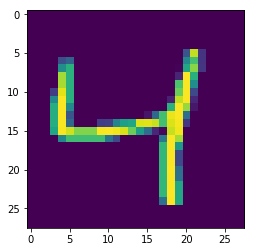

In [ ]:
plt.imshow(x_train[2])

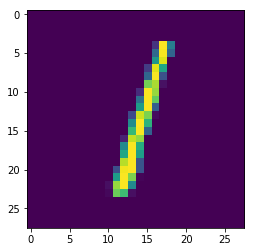

In [ ]:
plt.imshow(x_test[2])

In [ ]:
x_train[y_train==2].shape

(5958, 28, 28)

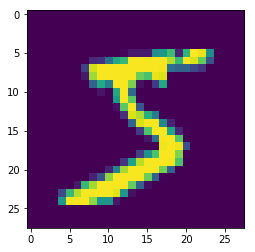

In [ ]:
plt.imshow(x_train[0])

  

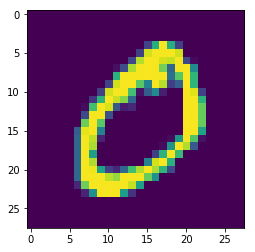

In [ ]:
plt.imshow(x_train[1])

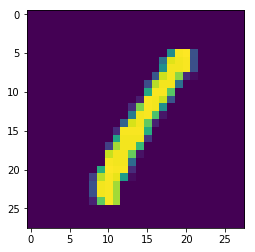

In [ ]:
plt.imshow(x_train[3])

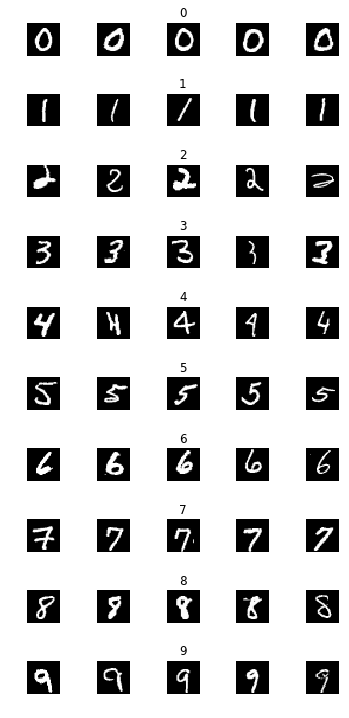

In [ ]:
num_classes=10
cols=5
num_of_samples=[]
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    #axs[j][i].imshow(x_selected[0])
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap="gray")
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(j)
      num_of_samples.append(len(x_selected))
      plt.hist(num_of_samples)
    
    

<BarContainer object of 10 artists>

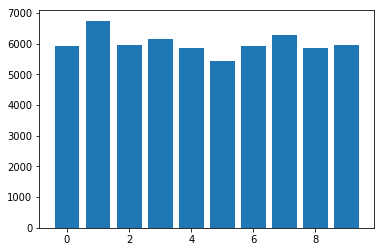

In [ ]:
#y=num_of_samples
#x=[0,1,2,3,4,5,6,7,8,9]
plt.bar(range(0,num_classes),num_of_samples)#y train to categorical data

In [ ]:
#day26


In [ ]:
x_train=x_train.reshape(-1,28,28,1)#reshaping to (28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [ ]:
y_train=to_categorical(y_train,10)#converting to categorical data
y_test=to_categorical(y_test,10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train=x_train/255#normalizing data
x_test=x_test/255

In [ ]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation="relu"))#convolution is applied for feature extraction
  model.add(MaxPooling2D(pool_size=(2,2)))#pooling is applied for compression of image
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())#for converting 2d image to 1d image
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.4))#0.5
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])#lr=learning rate earlier=0.01
  return model

In [ ]:
lenet=le_net()
lenet.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)      

In [ ]:
history=lenet.fit(x_train,
                  y_train,
                  epochs=8,#epochs-for no of repetitions
                  validation_split=0.1,
                  batch_size=400,
                  verbose=1,shuffle=1)#verbose-for displaying the message

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 57s 1ms/step - loss: 0.5493 - acc: 0.8298 - val_loss: 0.0917 - val_acc: 0.9742
Epoch 2/8
54000/54000 [==============================] - 57s 1ms/step - loss: 0.1312 - acc: 0.9614 - val_loss: 0.0604 - val_acc: 0.9823
Epoch 3/8
54000/54000 [==============================] - 57s 1ms/step - loss: 0.0953 - acc: 0.9711 - val_loss: 0.0485 - val_acc: 0.9863
Epoch 4/8
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0777 - acc: 0.9763 - val_loss: 0.0438 - val_acc: 0.9872
Epoch 5/8
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0667 - acc: 0.9798 - val_loss: 0.0399 - val_acc: 0.9883
Epoch 6/8
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0595 - acc: 0.9819 - val_loss: 0.0392 - val_acc: 0.9887
Epoch 7/8
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0531 - 

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

Text(0.5, 1.0, 'epoch')

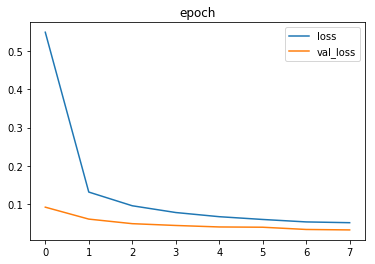

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])
plt.title("loss")
plt.title("epoch")

Text(0.5, 1.0, 'epoch')

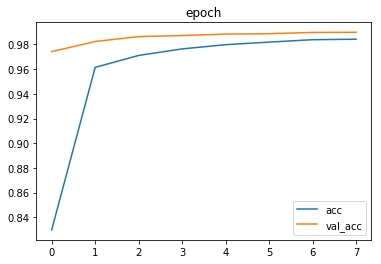

In [ ]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["acc","val_acc"])
plt.title("acc")
plt.title("epoch")

In [ ]:
#day27

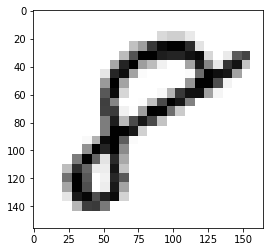

In [ ]:
import requests
from PIL import Image
url="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_169,h_161/https://kx.com/images/03_IMAGES/160520-8.png"
response=requests.get(url,stream=True)
img=Image.open(response.raw).convert("L")
plt.imshow(img,cmap="gray")



In [ ]:
img=np.asarray(img)

In [ ]:
img.shape

(156, 165)

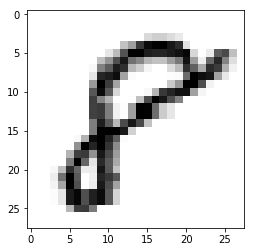

In [ ]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(28,28))
plt.imshow(res,cmap="gray")

In [ ]:
res=res/255
image=res.reshape(1,28,28,1)
image.shape

(1, 28, 28, 1)

In [ ]:
lenet.predict_classes(image)

array([8])